In [1]:
%matplotlib inline
import numpy as np

import scipy.stats as stat
import scipy.integrate as pyint
import scipy.optimize as opt

import matplotlib.pyplot as plt
from matplotlib import cm

# Unfolding
## Exercise 1
### Part a

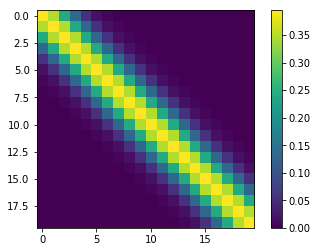

In [31]:
Nbins = 20
bin_edges = np.linspace(0,100,Nbins+1)
sigma = 2*(bin_edges[1]-bin_edges[0])
c_norm = 1./(np.sqrt(2)*sigma*pyint.quad(lambda x: np.exp(-x**2),0,100)[0])
def res_function(x,y):
    return c_norm*np.exp(-(x-y)**2/(2*sigma**2))

def int_res_fun(y,xa,xb):
    return pyint.quad(lambda x: res_function(x,y),xa,xb)[0]

bin_midpoint = .5*(bin_edges[1:]+bin_edges[:-1])
R_matrix = np.empty((Nbins,Nbins))
for i in range(Nbins):
    for j in range(Nbins):
        R_matrix[i,j]=int_res_fun(bin_midpoint[j],bin_edges[i],bin_edges[i+1])
        
plt.imshow(R_matrix)
plt.colorbar()

### Part b

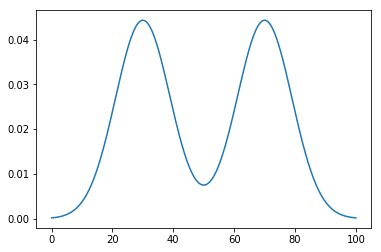

In [12]:
sigma_data = 9
c_data = 1./(np.sqrt(2)*sigma_data*pyint.quad(lambda x: np.exp(-x**2),0,100)[0])

def f_true(x):
    return .5*c_data*(np.exp(-(x-30)**2/(2*sigma_data**2))+np.exp(-(x-70)**2/(2*sigma_data**2)))

x_plot = np.linspace(0,100,1000)
plt.plot(x_plot,f_true(x_plot))

In [28]:
N = 100000
fmax = max(x_plot)
mu_sample_b = np.empty(2*N)
samples = 0
while samples<N:
    mu = 100*np.random.random(5*10**6)           
    y = fmax*np.random.random(5*10**6)
    mu = mu[y<=f_true(mu)]
    samples += len(mu)
    mu_sample_b[samples-len(mu):samples] = mu
mu_sample_b = mu_sample_b[:N]

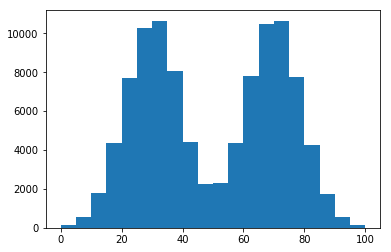

In [30]:
mu_hist, bin_edges, patches = plt.hist(mu_sample_b,bins=bin_edges)

<Container object of 20 artists>

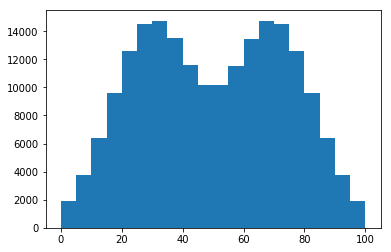

In [33]:
nu_hist = np.dot(R_matrix,mu_hist)
plt.bar(bin_midpoint,nu_hist,width=bin_edges[1]-bin_edges[0])

<Container object of 20 artists>

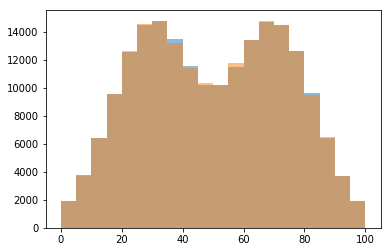

In [37]:
N_d = len(nu_hist)
poisson = stat.poisson(nu_hist)
Nexperiment_d = poisson.rvs(N_d)
plt.figure()
plt.bar(bin_midpoint,nu_hist,width=bin_edges[1]-bin_edges[0],alpha=0.5)
plt.bar(bin_midpoint,Nexperiment_d,width=bin_edges[1]-bin_edges[0],alpha=0.5)

### Part e

<Container object of 20 artists>

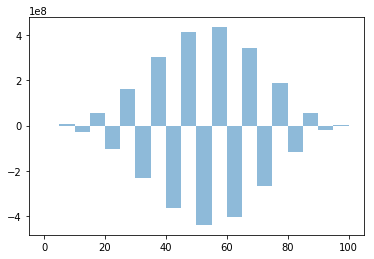

In [43]:
R_inv = np.linalg.inv(R_matrix)
mu_estimated_inv = np.dot(R_inv,Nexperiment_d)
plt.figure()
plt.bar(bin_midpoint,mu_estimated_inv,width=bin_edges[1]-bin_edges[0],alpha=0.5)
plt.bar(bin_midpoint,mu_hist,width=bin_edges[1]-bin_edges[0],alpha=0.5)

### Part f

In [83]:
def likelihood_mu_hist(mu_hist_try):
    diff = 1
    mu_hist_diff = mu_hist_try+diff
    nu_hist_try = np.round(np.dot(R_matrix,mu_hist_try))
    nu_hist_diff = np.round(np.dot(R_matrix,mu_hist_diff))
    logp_i = nu_hist_try*np.log(Nexperiment_d)-nu_hist_try*np.log(nu_hist_try)+nu_hist_try
    logp_i_diff = nu_hist_diff*np.log(Nexperiment_d)-nu_hist_diff*np.log(nu_hist_diff)+nu_hist_diff
    jac = -(logp_i_diff-logp_i)/diff
    return -sum(logp_i),jac

minimization_like = opt.minimize(likelihood_mu_hist,Nexperiment_d,jac=True)
print minimization_like
mu_estimated_like = minimization_like['x']

      fun: nan
 hess_inv: array([[ 141.99279843,  117.69007177,  191.87999226,  158.73081605,
         136.62402479,  127.92506597,  134.38176624,  160.18307607,
         188.25166595,  207.99233385,  211.82523918,  182.7062913 ,
         157.41788716,  135.79451795,  129.45630457,  137.14590428,
          80.28016613,  187.67300766,  235.15843898,  143.26163258],
       [ 117.69007177,   99.23872266,  160.16682455,  132.49641344,
         114.04334405,  106.78211459,  112.17167656,  133.70864688,
         157.13817029,  173.61617807,  176.81559569,  152.50931347,
         131.40047747,  113.35093395,  108.06027572,  114.47896899,
          67.01177971,  156.65514999,  196.2923779 ,  119.58392616],
       [ 191.87999226,  160.16682455,  262.13339903,  216.02000854,
         185.93442206,  174.09583092,  182.88288536,  217.99641275,
         256.19552819,  283.06100516,  288.27728374,  248.64871504,
         214.23321069,  184.80552735,  176.17972393,  186.6446577 ,
         109.2549224

C:\Users\Oriol\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\Oriol\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


<Container object of 20 artists>

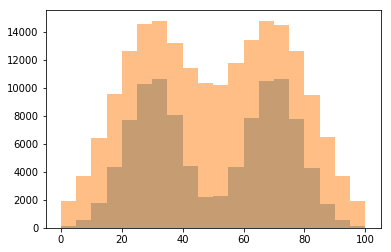

In [74]:
plt.bar(bin_midpoint,mu_hist,width=bin_edges[1]-bin_edges[0],alpha=0.5)
plt.bar(bin_midpoint,mu_estimated_like,width=bin_edges[1]-bin_edges[0],alpha=0.5)